## **Data Preprocessing Using NLP**

In [ ]:
# Step 1: Data Preprocessing
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Load the dataset
data = pd.read_csv('Diabetes.csv')
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values (assuming forward fill for simplicity)
data.fillna(method='ffill', inplace=True)

# Drop any remaining NaN values if present
data.dropna(inplace=True)

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [ ]:
# Separate the target variable
y = data['Diabetes_012']

# Create a copy of the data without the target variable
X = data.drop(columns=['Diabetes_012'])

In [ ]:
# Select the first 10,000 data points
X_subset = X[:5000]
y_subset = y[:5000]

In [ ]:
# Combine X_subset and y_subset to form the revised dataset
orginal_data = pd.concat([X_subset, y_subset], axis=1)

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

In [ ]:
# Function for text preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Iterate over columns and apply preprocessing
for col in X.columns:
    if X[col].dtype == 'object':  # Check if column is of type object (text)
        X[col] = X[col].apply(preprocess_text)

# Encode categorical variables
X = pd.get_dummies(X)

# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])


# **Exploratory Data Analysis (EDA)**

In [ ]:
# Step 2: Exploratory Data Analysis (EDA)
print(X.describe())

             HighBP      HighChol     CholCheck           BMI        Smoker  \
count  2.536800e+05  2.536800e+05  2.536800e+05  2.536800e+05  2.536800e+05   
mean  -1.250340e-16  5.769939e-17  1.245859e-16 -2.505162e-16  2.688903e-17   
std    1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min   -8.667854e-01 -8.581816e-01 -5.078164e+00 -2.478916e+00 -8.921186e-01   
25%   -8.667854e-01 -8.581816e-01  1.969216e-01 -6.631223e-01 -8.921186e-01   
50%   -8.667854e-01 -8.581816e-01  1.969216e-01 -2.091739e-01 -8.921186e-01   
75%    1.153688e+00  1.165254e+00  1.969216e-01  3.960906e-01  1.120927e+00   
max    1.153688e+00  1.165254e+00  1.969216e-01  1.053427e+01  1.120927e+00   

             Stroke  HeartDiseaseorAttack  PhysActivity        Fruits  \
count  2.536800e+05          2.536800e+05  2.536800e+05  2.536800e+05   
mean  -4.033355e-18          4.257430e-18  5.377807e-17  5.601882e-17   
std    1.000002e+00          1.000002e+00  1.000002e+00  1.000002e+00

# **Ensemble Learning for Original Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.gaussian_process.kernels import Matern
from sklearn.inspection import permutation_importance
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Dropout

Accuracy of Gradient Boosting Classifier: 0.796
Accuracy of Random Forest Classifier: 0.788
Accuracy of AdaBoost Classifier: 0.79


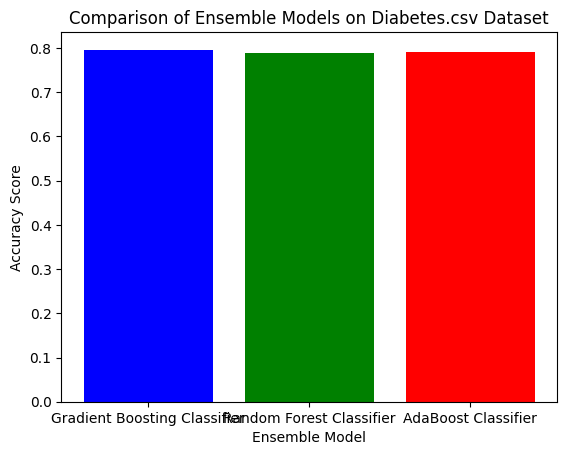

In [ ]:
# Hyperparameter Tuning
params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

# GridSearchCV for GradientBoostingClassifier
gbm_grid = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=params, cv=5)
gbm_grid.fit(X_train, y_train)
best_gbm = gbm_grid.best_estimator_

# RandomForestClassifier and AdaBoostClassifier
rfc = RandomForestClassifier()
adaboost = AdaBoostClassifier()

# GridSearchCV for RandomForestClassifier
# Define the parameters for tuning for RandomForestClassifier
rfc_params = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5]
}

rfc_grid = GridSearchCV(estimator=rfc, param_grid=rfc_params, cv=5)
rfc_grid.fit(X_train, y_train)

# GridSearchCV for AdaBoostClassifier
# Define the parameters for tuning for AdaBoostClassifier
adaboost_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1]
}

adaboost_grid = GridSearchCV(estimator=adaboost, param_grid=adaboost_params, cv=5)
adaboost_grid.fit(X_train, y_train)

# Train ensemble models
ensemble_models = [best_gbm, rfc_grid.best_estimator_, adaboost_grid.best_estimator_]
for model in ensemble_models:
    model.fit(X_train, y_train)

# Evaluate ensemble models
ensemble_scores = []
for model in ensemble_models:
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    ensemble_scores.append(score)

# Print accuracy of each model
print("Accuracy of Gradient Boosting Classifier:", ensemble_scores[0])
print("Accuracy of Random Forest Classifier:", ensemble_scores[1])
print("Accuracy of AdaBoost Classifier:", ensemble_scores[2])

# Compare ensemble models using matplotlib
plt.bar(['Gradient Boosting Classifier', 'Random Forest Classifier', 'AdaBoost Classifier'], ensemble_scores, color = ['blue', 'green', 'red'])
plt.xlabel('Ensemble Model')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Ensemble Models on Diabetes.csv Dataset')
plt.show()


In [ ]:
# Personalized risk assessment using Gaussian Process Classifier with Matérn kernel
gpc = GaussianProcessClassifier(kernel=1.0 * RBF(1.0) + Matern(length_scale=2.0, nu=1.5))

# Fit the GPC model
gpc.fit(X_train, y_train)

# Evaluate Gaussian Process Classifier with Matérn kernel
y_pred_gpc = gpc.predict(X_test)
print("\nGaussian Process Classifier Performance with Matérn kernel:")
print("Accuracy:", accuracy_score(y_test, y_pred_gpc))
print("Classification Report:")
print(classification_report(y_test, y_pred_gpc))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gpc))


Gaussian Process Classifier Performance with Matérn kernel:
Accuracy: 0.788
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.96      0.88       793
         1.0       0.00      0.00      0.00        17
         2.0       0.44      0.14      0.21       190

    accuracy                           0.79      1000
   macro avg       0.42      0.37      0.36      1000
weighted avg       0.73      0.79      0.74      1000

Confusion Matrix:
[[762   0  31]
 [ 15   0   2]
 [164   0  26]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Building Attention-based GAN for Data Augmentation**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Reshape, Flatten, Dot, Add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define the dimensions of the input noise vector
latent_dim = 100

# Define the attention layer
def attention_layer(x):
  # Attention mechanism with a single attention head
  attention_weights = Dense(128, activation='softmax')(x)  # Change the shape to match x
  attention_weights = Reshape((x.shape[-1],))(attention_weights)  # Reshape to match x shape
  context_vector = Dot(axes=1)([attention_weights, x])
  output = Add()([x, context_vector])  # Add weighted features to original input
  return output

# Define the generator model with attention
def build_generator(latent_dim):
  input_noise = Input(shape=(latent_dim,))
  x = Dense(128, activation='relu')(input_noise)
  x = attention_layer(x)  # Apply attention layer
  x = Dense(256, activation='relu')(x)
  x = Dense(512, activation='relu')(x)
  output = Dense(data.shape[1], activation='sigmoid')(x)  # Output layer matches data dimension
  generator = Model(inputs=input_noise, outputs=output)
  return generator

# Define the discriminator model
def build_discriminator(input_shape):
    input_data = Input(shape=input_shape)
    x = Dense(512, activation='relu')(input_data)
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    output = Dense(1, activation='sigmoid')(x)
    discriminator = Model(inputs=input_data, outputs=output)
    discriminator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5), metrics=['accuracy'])
    return discriminator

# Compile the discriminator
discriminator = build_discriminator(input_shape=(data.shape[1],))
discriminator.trainable = False

# Build the GAN model
generator = build_generator(latent_dim)
gan_input = Input(shape=(latent_dim,))
synthetic_data = generator(gan_input)
gan_output = discriminator(synthetic_data)
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))

# Training the GAN
def train_gan(data, generator, discriminator, gan, latent_dim, epochs=1000, batch_size=128):
    for epoch in range(epochs):
        # Sample random noise for generator input
        noise = np.random.normal(0, 1, (batch_size, latent_dim))

        # Generate synthetic data
        generated_data = generator.predict(noise)

        # Select a random batch of real data
        idx = np.random.randint(0, data.shape[0], batch_size)
        real_data = data[idx]

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(real_data, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(generated_data, np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator (via the GAN model)
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        valid_labels = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_labels)

        # Print progress
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Discriminator Loss: {d_loss[0]}, Generator Loss: {g_loss}")

# Train the GAN
train_gan(data.values.astype('float32'), generator, discriminator, gan, latent_dim)


4/4 [==============================] - 0s 5ms/step
Epoch 0, Discriminator Loss: 0.5453738570213318, Generator Loss: 0.6327495574951172
4/4 [==============================] - 0s 4ms/step
Epoch 100, Discriminator Loss: 0.045047394814901054, Generator Loss: 2.531789779663086
4/4 [==============================] - 0s 3ms/step
Epoch 200, Discriminator Loss: 0.0033581033494556323, Generator Loss: 5.028956890106201
4/4 [==============================] - 0s 3ms/step
Epoch 300, Discriminator Loss: 0.0007328308622049917, Generator Loss: 6.544902801513672
4/4 [==============================] - 0s 3ms/step
Epoch 400, Discriminator Loss: 0.00020015697339204053, Generator Loss: 7.852421760559082
4/4 [==============================] - 0s 4ms/step
Epoch 500, Discriminator Loss: 7.771116408594736e-05, Generator Loss: 8.787991523742676
4/4 [==============================] - 0s 5ms/step
Epoch 600, Discriminator Loss: 0.00012877365060439284, Generator Loss: 8.291536331176758
4/4 [=========================

In [ ]:
# Generate synthetic data using the trained generator model
import random
from sklearn.model_selection import train_test_split

# Define the number of synthetic samples to generate
num_synthetic_samples = len(data)  # Generate as many synthetic samples as the original data

# Generate random noise for the generator input
noise = np.random.normal(0, 1, (num_synthetic_samples, latent_dim))

# Generate synthetic data
synthetic_data = generator.predict(noise)

# Convert synthetic_data to DataFrame
synthetic_df = pd.DataFrame(synthetic_data)

# Now, synthetic_df contains the generated synthetic data
print(synthetic_df.head())

7928/7928 [==============================] - 18s 2ms/step
         0             1         2         3         4         5   \
0  0.001361  9.213932e-07  0.000037  0.000110  0.999986  0.000098   
1  0.007125  1.475517e-05  0.000353  0.000517  0.999755  0.000690   
2  0.000303  4.394090e-08  0.000006  0.000024  0.999998  0.000015   
3  0.001315  8.457310e-07  0.000068  0.000091  0.999978  0.000159   
4  0.000568  1.134082e-07  0.000018  0.000026  0.999995  0.000029   

             6             7         8         9   ...        12  \
0  5.572448e-06  2.899499e-06  0.000205  0.000019  ...  0.000110   
1  5.438072e-05  4.371556e-05  0.000802  0.000107  ...  0.000385   
2  2.163117e-07  8.394915e-08  0.000022  0.000001  ...  0.000027   
3  8.187963e-06  3.574150e-06  0.000204  0.000020  ...  0.000112   
4  8.184310e-07  4.029093e-07  0.000043  0.000003  ...  0.000023   

             13        14        15        16            17        18  \
0  6.151457e-06  0.002776  0.000032  0.001019

In [ ]:
# Separate the target variable
y = synthetic_data[:, 0]

# Create a copy of the data without the target variable
X = synthetic_data[:, 1:]

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.gaussian_process.kernels import Matern
from sklearn.inspection import permutation_importance
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Dropout

Accuracy of Gradient Boosting Classifier: 0.796
Accuracy of Random Forest Classifier: 0.795
Accuracy of AdaBoost Classifier: 0.791


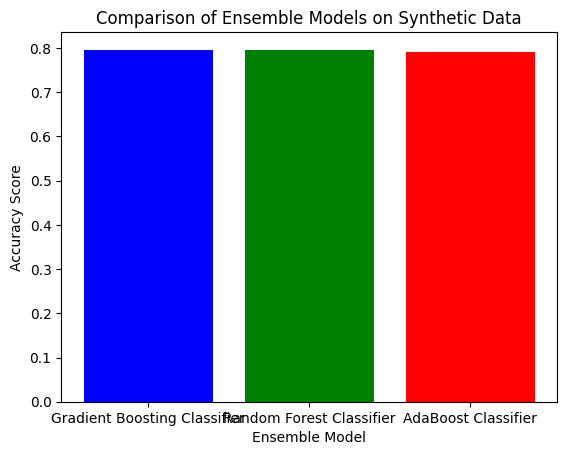

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define the hyperparameters for GradientBoostingClassifier
gbm_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# GridSearchCV for GradientBoostingClassifier
gbm_grid = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=gbm_params, cv=5)
gbm_grid.fit(X_train, y_train)
best_gbm = gbm_grid.best_estimator_

# Define the hyperparameters for RandomForestClassifier
rfc_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7]
}

# GridSearchCV for RandomForestClassifier
rfc_grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=rfc_params, cv=5)
rfc_grid.fit(X_train, y_train)
best_rfc = rfc_grid.best_estimator_

# Define the hyperparameters for AdaBoostClassifier
adaboost_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2]
}

# GridSearchCV for AdaBoostClassifier
adaboost_grid = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=adaboost_params, cv=5)
adaboost_grid.fit(X_train, y_train)
best_adaboost = adaboost_grid.best_estimator_

# Train the ensemble models with the best hyperparameters
ensemble_models = [best_gbm, best_rfc, best_adaboost]
for model in ensemble_models:
    model.fit(X_train, y_train)

# Evaluate ensemble models
ensemble_scores = []
for model in ensemble_models:
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    ensemble_scores.append(score)

# Print accuracy of each model
print("Accuracy of Gradient Boosting Classifier:", ensemble_scores[0])
print("Accuracy of Random Forest Classifier:", ensemble_scores[1])
print("Accuracy of AdaBoost Classifier:", ensemble_scores[2])

# Compare ensemble models using matplotlib
plt.bar(['Gradient Boosting Classifier', 'Random Forest Classifier', 'AdaBoost Classifier'], ensemble_scores, color=['blue', 'green', 'red'])
plt.xlabel('Ensemble Model')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Ensemble Models on Synthetic Data')
plt.show()


Accuracy of Gradient Boosting Classifier: 0.796
Accuracy of Random Forest Classifier: 0.791
Accuracy of AdaBoost Classifier: 0.79


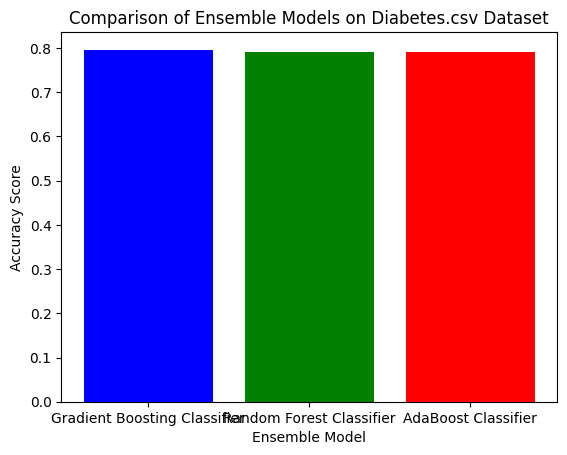

In [ ]:
# Hyperparameter Tuning
params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

# GridSearchCV for GradientBoostingClassifier
gbm_grid = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=params, cv=5)
gbm_grid.fit(X_train, y_train)
best_gbm = gbm_grid.best_estimator_

# RandomForestClassifier and AdaBoostClassifier
rfc = RandomForestClassifier()
adaboost = AdaBoostClassifier()

# GridSearchCV for RandomForestClassifier
# Define the parameters for tuning for RandomForestClassifier
rfc_params = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5]
}

rfc_grid = GridSearchCV(estimator=rfc, param_grid=rfc_params, cv=5)
rfc_grid.fit(X_train, y_train)

# GridSearchCV for AdaBoostClassifier
# Define the parameters for tuning for AdaBoostClassifier
adaboost_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1]
}

adaboost_grid = GridSearchCV(estimator=adaboost, param_grid=adaboost_params, cv=5)
adaboost_grid.fit(X_train, y_train)

# Train ensemble models
ensemble_models = [best_gbm, rfc_grid.best_estimator_, adaboost_grid.best_estimator_]
for model in ensemble_models:
    model.fit(X_train, y_train)

# Evaluate ensemble models
ensemble_scores = []
for model in ensemble_models:
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    ensemble_scores.append(score)

# Print accuracy of each model
print("Accuracy of Gradient Boosting Classifier:", ensemble_scores[0])
print("Accuracy of Random Forest Classifier:", ensemble_scores[1])
print("Accuracy of AdaBoost Classifier:", ensemble_scores[2])

# Compare ensemble models using matplotlib
plt.bar(['Gradient Boosting Classifier', 'Random Forest Classifier', 'AdaBoost Classifier'], ensemble_scores, color = ['blue', 'green', 'red'])
plt.xlabel('Ensemble Model')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Ensemble Models on Diabetes.csv Dataset')
plt.show()


In [ ]:
# Personalized risk assessment using Gaussian Process Classifier with Matérn kernel
gpc = GaussianProcessClassifier(kernel=1.0 * RBF(1.0) + Matern(length_scale=2.0, nu=1.5))

# Fit the GPC model
gpc.fit(X_train, y_train)

# Evaluate Gaussian Process Classifier with Matérn kernel
y_pred_gpc = gpc.predict(X_test)
print("\nGaussian Process Classifier Performance with Matérn kernel:")
print("Accuracy:", accuracy_score(y_test, y_pred_gpc))
print("Classification Report:")
print(classification_report(y_test, y_pred_gpc))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gpc))


Gaussian Process Classifier Performance with Matérn kernel:
Accuracy: 0.788
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.96      0.88       793
         1.0       0.00      0.00      0.00        17
         2.0       0.44      0.14      0.21       190

    accuracy                           0.79      1000
   macro avg       0.42      0.37      0.36      1000
weighted avg       0.73      0.79      0.74      1000

Confusion Matrix:
[[762   0  31]
 [ 15   0   2]
 [164   0  26]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pickle
filename = 'savemodel.sav'
pickle.dump(gpc,open(filename,'wb'))

In [ ]:
load_model = pickle.load(open(filename,'rb'))